<a href="https://colab.research.google.com/github/debajyoti-iitm/Basic-and-Machine-Learning-Programs-In-Python/blob/main/Python_Scikit_learn_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #importing numpy
from sklearn import linear_model, datasets, tree #importing linear models etc from scikit-learn
import matplotlib.pyplot as plt #and importing matplotlib for plotting

**1. Linear regression**

**Prepare data**

First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data: $$y = \frac{x}{2}+sin(x)+\epsilon$$ Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

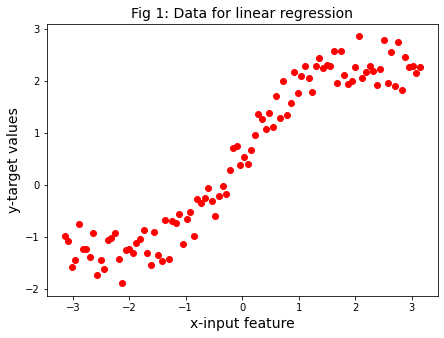

In [10]:
number_of_samples = 100 #we can give any number of sample data points
x = np.linspace(-np.pi, np.pi, number_of_samples) #We have discussed about np.linspace  below
y = 0.5*x+np.sin(x)+np.random.random(x.shape) #this is the function
plt.figure(figsize=(7,5)) # changing figure size
plt.scatter(x,y,color='red') #Plot y-vs-x in dots
plt.xlabel('x-input feature',fontsize=14)
plt.ylabel('y-target values',fontsize=14)
plt.title('Fig 1: Data for linear regression',fontsize=14)
plt.show()#showing the plots

The NumPy linspace function creates sequences of evenly spaced values within a defined interval.
Essentally, you specify a starting point and an ending point of an interval, and then specify the total number of breakpoints you want within that interval (including the start and end points). The np.linspace function will return a sequence of evenly spaced values on that interval.
More on [here](https://www.sharpsightlabs.com/blog/numpy-linspace/#:~:text=The%20NumPy%20linspace%20function%20%28sometimes%20called%20np.linspace%29%20is,a%20NumPy%20array.%20There%20are%20some%20differences%20though.) 

# **Split the dataset into training, validation and test sets**
It is always encouraged in machine learning to split the available data into training, validation and test sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model generalizes. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the test data and the performance is reported in the final description of the model.

In this example we do a  70%−15%−15%  random split of the data between the training, validation and test sets respectively.

In [ ]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]] #training dataset from 1 to 70
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]] #then 15 elements for validation
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]] #and last 15 elements for testing
y_test = y[random_indices[85:]]

# **Fit a line to the data**
Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. We will fit a line to our data using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

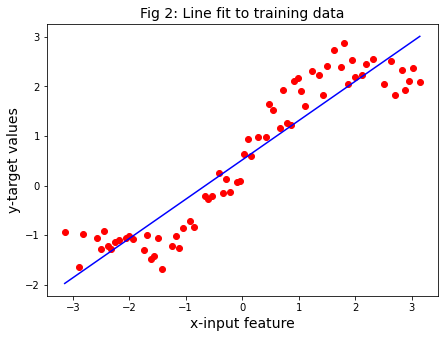

In [11]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.figure(figsize=(7,5)) # changing figure size
plt.scatter(x_train, y_train, color='red') #the actual dataset is plotted in red
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue') #fitting line is plotted in blue
plt.xlabel('x-input feature',fontsize=14)
plt.ylabel('y-target values',fontsize=14)
plt.title('Fig 2: Line fit to training data',fontsize=14)
plt.show()

# **Evaluate the model**
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the mean squared error on the validation and test sets.

In [13]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 ) #define validation error
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 ) #error in the testing dataset

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  4.76676367488294 
Test MSE:  5.389844872285567
